In [542]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
import sklearn
import mpld3

In [543]:
df = pd.read_table("./careerData.txt")

In [544]:
df = df[['Title','Description']]

In [545]:
df.columns = ['title','description']
display(df)

,title,description
0,Chief Executives,Determine and formulate policies and provide o...
1,Chief Sustainability Officers,"Communicate and coordinate with management, sh..."
2,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
3,Legislators,"Develop, introduce or enact laws and statutes ..."
4,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici..."
5,Green Marketers,Create and implement methods to market green p...
6,Marketing Managers,"Plan, direct, or coordinate marketing policies..."
7,Sales Managers,"Plan, direct, or coordinate the actual distrib..."
8,Public Relations and Fundraising Managers,"Plan, direct, or coordinate activities designe..."
9,Administrative Services Managers,"Plan, direct, or coordinate one or more admini..."


In [546]:
stopwords = nltk.corpus.stopwords.words('english')

In [547]:
stemmer = nltk.stem.snowball.SnowballStemmer('english')

In [548]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [549]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [550]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in df['description'].values:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [551]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

In [552]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [553]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=200000,
    stop_words='english',
    use_idf=True, 
    tokenizer=tokenize_and_stem, 
    ngram_range=(1,3)
)

In [554]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'].values)

In [555]:
terms = tfidf_vectorizer.get_feature_names()

In [556]:
print(terms)

["'s", "'s account", "'s account prepar", "'s appear", "'s appear includ", "'s assist", "'s assist hold", "'s blood", "'s blood stream", "'s budget", "'s budget polici", "'s cage", "'s cage desk", "'s credit", "'s credit applic", "'s credit stand", "'s custom", "'s custom satisfi", "'s diseas", "'s diseas injuri", "'s hand", "'s hand player", "'s hand tool", "'s home", "'s home care", "'s intern", "'s intern composit", "'s liabil", "'s liabil concern", "'s local", "'s local area", "'s numer", "'s numer code", "'s physic", "'s physic emot", "'s profit", "'s profit share", "'s request", "'s request use", "'s secur", "'s secur function", "'s signatur", "'s signatur receipt", "'s specif", "'s specif compil", "'s studi", "'s studi urban", "'s surfac", "'s surfac engin", "'s surfac includ", "'s surfac relat", "'s surfac use", "'s toy", "'s toy combin", "'s various", "'s various transact", "'s vital", "'s vital sign", "'s wheel", "'s wheel process", "'s work", "'s work goal", "'s worth", "'s 

In [557]:
from sklearn.metrics.pairwise import cosine_similarity

In [558]:
dist = 1 - cosine_similarity(tfidf_matrix)

In [559]:
from sklearn.cluster import KMeans

In [560]:
num_clusters = 50
km = KMeans(n_clusters=num_clusters)

In [561]:
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [562]:
clusters = km.labels_.tolist()

In [563]:
df['cluster'] = clusters

In [564]:
df['cluster'].value_counts()

44    60
23    53
8     43
37    41
3     36
26    35
29    34
2     33
15    33
33    33
27    31
19    29
35    26
18    25
40    25
20    24
47    23
21    22
12    22
30    22
7     21
34    21
36    21
32    20
48    20
28    19
38    19
43    19
46    19
5     19
49    18
6     18
45    18
25    16
39    16
10    16
11    16
24    15
31    14
41    14
13    12
14    12
1     12
42    11
0     11
9     10
17     9
4      9
16     8
22     7
Name: cluster, dtype: int64

In [565]:
grouped1 = pd.DataFrame(df['title'].groupby(df['cluster']).agg("|".join))


In [566]:
grouped2 = pd.DataFrame(df['description'].groupby(df['cluster']).agg("|".join))

In [567]:
grouped = grouped1.join(grouped2)

In [568]:
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

In [569]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1,n_jobs=-3)

In [570]:
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

In [571]:
xs, ys = pos[:, 0], pos[:, 1]

In [572]:
%matplotlib inline 

In [573]:
df = pd.DataFrame(dict(x=xs, y=ys,label=clusters)) 

In [574]:
groups = df.groupby('label')

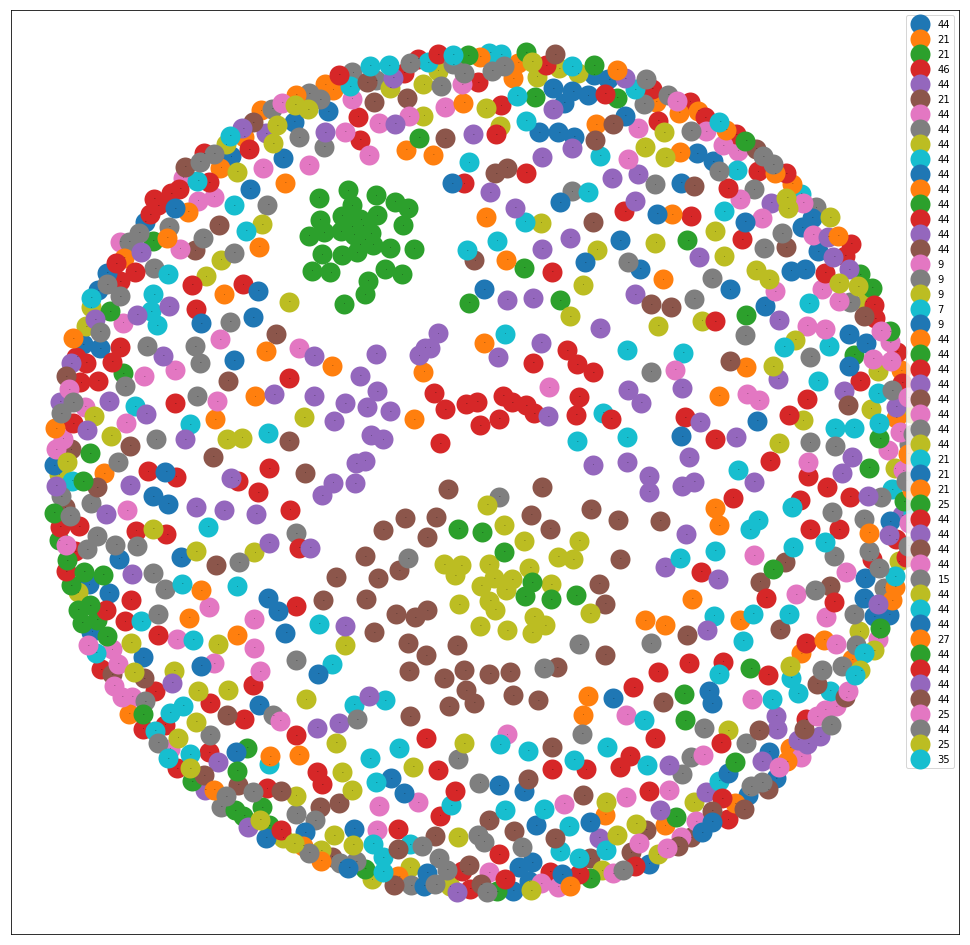

In [575]:
fig, ax = plt.subplots(figsize=(17, 17))

NUM_COLORS = num_clusters

cm = plt.get_cmap('gist_rainbow')
# ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=20, mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    ax.legend(numpoints=1,labels=clusters)
for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['label'], size=0) 

In [584]:
text = "cooking"
X = tfidf_vectorizer.transform(tokenize_and_stem(text))
print(grouped.iloc[km.predict(X)]['title'].values)

['Biostatisticians|Agricultural Engineers|Biochemical Engineers|Food Scientists and Technologists|Biochemists and Biophysicists|Conservation Scientists|Chemists|Environmental Scientists and Specialists, Including Health|Industrial Ecologists|Anthropologists and Archeologists|Agricultural and Food Science Technicians|Food Science Technicians|Chemical Technicians|Set and Exhibit Designers|Dietitians and Nutritionists|Dietetic Technicians|Chefs and Head Cooks|Cooks, Fast Food|Cooks, Institution and Cafeteria|Cooks, Short Order|Food Preparation Workers|Combined Food Preparation and Serving Workers, Including Fast Food|Counter Attendants, Cafeteria, Food Concession, and Coffee Shop|Baristas|Waiters and Waitresses|Food Servers, Nonrestaurant|Dining Room and Cafeteria Attendants and Bartender Helpers|Dishwashers|Graders and Sorters, Agricultural Products|Furniture Finishers|Biofuels Processing Technicians|Flight Attendants|Transportation Attendants, Except Flight Attendants']
